K-Means Clustering - Overview
=================================================

## How do I discover natural groupings or segments in my data? 
  

### Introduction

Often we are given a large mass of data with no training labels.  That is, the data does not tell us what a "good" data item is and what a "bad" one is. So we have no prior idea what to look for.  In cases like these,  where we want to bootstrap our data exploration, to find some hook, some insight to get started,  looking for similar items or "clusters" is a well known approach.

Clustering techniques operate on the attributes of our data and find "clumps" of data items that have attribute values that are close. One of the most common clustering techniques is "K-Means Clustering" which is simple to understand but powerful in impact.  It is also "computationally hard" from a theoretical point of view, i.e. as simple as it looks it can be demanding of computational resources and take time to converge to a solution.


### Supervised and unsupervised learning

K-Means Clustering is one of the many techniques that constitute "unsupervised learning".
Before this we've looked at data that had some examples of good data and some of bad, or some examples of data that was classified in category A other in B, C, D and so on.  That is, we could learn from examples.  This mode of learning from examples is called "supervised learning" because you are given some prior training ("supervision") of how to proceed.   Most often in supervised learning one creates a model that fits the training data and then uses the model to predict over an unknown data set.

Quite often no such prior knowledge (training data) exists and we are just given a data set and told - "go extract some insights".  This mode, where we have to find patterns in data without guidance of prior knowledge, is called "unsupervised learning". There is no "supervision" in the form of examples of good classification.  So we have to dive in and dig out *some* nugget(s) of wisdom, no matter what, to get started.

K-Means Clustering is our "power excavator" to clear out the ""data underbrush" and *then* lay the foundation of our grand data analysis edifice.


### What is it and how does it work?

What is K-Means Clustering?  First of all the name - it is called so because it operates by computing the "mean" of some attributes. That "mean" then becomes the center of one cluster. There are a small number, K, of such clusters. That is, the technique consists of computing "K number of means" leading to "clustering" of the data, around these "K means".

How do we choose this K?  If we have some idea of what we are looking for or how many clsuters we expect or want, then we set K to be that number before we start the engines and let the algorithm rev along.

If we don't know how many there are then our exploration will take a little longer and involve some trial and error as we try say K=3,4,5 until we see that the clusters are making some sense to us in our domain.  

The K-Means algorithm is iterative. It starts by choosing K points at random from the data and use these as "cluster centers" just to get started. Then it at each step it decides which cluster to assign a point to based on which cluster center is closest.

Once that is done it we have a new arrangement of points and so the "center" or "mean" of the cluster" is computed again because it will have most probably shifted.   When does it not shift?  When we have a stable clustering. That is when we have iterated till we get no benefit from iterating further then that is our result.

There are conditions under which K-Means does not converge i.e. there are no stable clusters but we won't get into that here. 

### A simple example

Let's look at a well known public data set the 'iris' data set and see how irises cluster according to their properties.  This is just an example and we'll do this with a real world data set a little later.  There are three species named 'setosa'(in blue), 'virginica'(in green) and 'versicolor'(in red) represented in the scatter plot below.

We are looking at two distinguishing characteristics, Sepal Length and Petal Length and plotting these.

Populating the interactive namespace from numpy and matplotlib


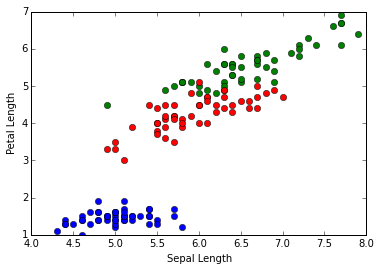

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('../datasets/iris.csv')

setosa = df[df.Species=='Iris-setosa']
versicolor = df[df.Species=='Iris-versicolor']
virginica = df[df.Species=='Iris-virginica']

s = plot(setosa['SepalLength'],setosa['PetalLength'],'bo')
vi = plot(virginica['SepalLength'],virginica['PetalLength'],'go')
ve = plot(versicolor['SepalLength'],versicolor['PetalLength'],'ro')
lx = ve[0].axes.set_xlabel('Sepal Length')
ly = ve[0].axes.set_ylabel('Petal Length')


Here we see how data points cluster together when they have similarities.  We use this as an illustration because we knew beforehand that the data had three species of iris, and naturally we expect that their properties will be similar so they will show up as clusters.  But when we don't know in advance what the underlying data set looks like - we need to be able to explore and look for such clusters, although we may not know of these beforehand. Secondly, the data might cluster according to some properties but not according to others.

### Exercise
Look up the Iris Data set, which is well known in data science circles as a toy example data set.  Then run the above code segment on different attributes than Petal Length and Sepal Length.  
  
How does the clustering vary?  
  
Can you see how picking the variables on which to cluster is an exploratory exercise and there is no a-priori set that stands out automatically or algorithmically?  
  
Does domain knowledge, i.e. knowing what flowers are and knowing their characteristics, help in picking the attributes on which to cluster?  



### Applications

So how does K-Means Clustering help us in understanding our data better and where is it most useful?  

First of all, we know this technique is useful in initial exploration of data when we have no training samples. But that's too general.  

More specifically here are a few examples of usage but these are not the only ones and certainly not the most definitive ones.

* Disambiguation of terms in a text corpus - how do we know if "jaguar" refers to a car or an animal?  The other words "near" jaguar can tell us, i.e. if the words in the same cluster as jaguar are "leopard","habitat","prey"  vs "mileage","f type", "luxury" we know what the word refers to in this context. Or more importantly whether the document in which this term occurs is about cars or animals.  So document clustering is the overall application area.

* Customer demographics.  Clustering customer data can tell us whether there are patterns in purchasing and then we can drill down into the clusters by building predictive models inside each cluster e.g. using multivariate linear regression

* Political categories like the famous "soccer moms" coud be discovered using K-Means clustering.

But once again, this technique is used for initial exploration when training samples are not available.

We are going to apply K-Means to a data set from the UN on economic and demographic data for different countries, and use some well known techniques to find a "good" K to use.


In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()